# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Build a regression model**

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [8]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [10]:
# Get basic information
### YOUR CODE HERE ###
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [11]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [6]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# Drop rows with missing values
### YOUR CODE HERE ###
clean_data = data.dropna()

In [8]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
clean_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
clean_data.duplicated().sum()


0

Check for and handle outliers.

<Axes: >

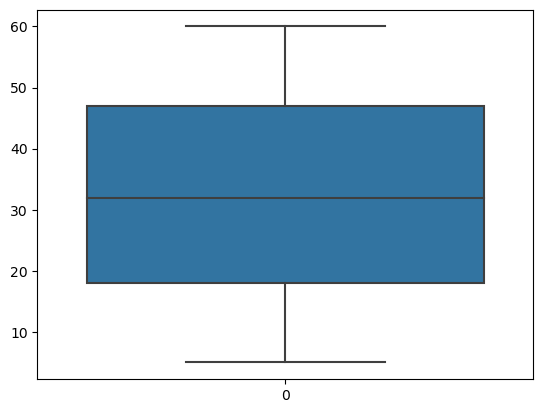

In [21]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###

sns.boxplot(clean_data['video_duration_sec'])

<Axes: >

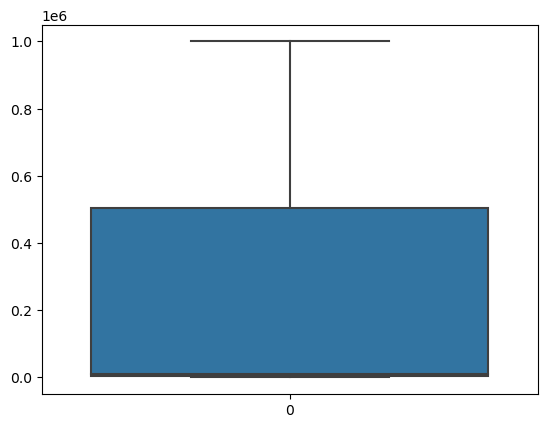

In [22]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(clean_data['video_view_count'])


<Axes: >

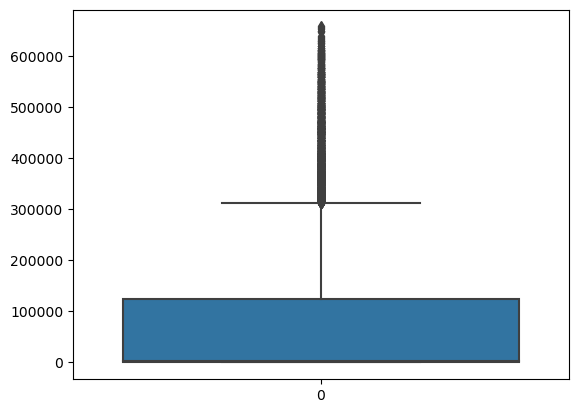

In [25]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
sns.boxplot(clean_data['video_like_count'])


<Axes: >

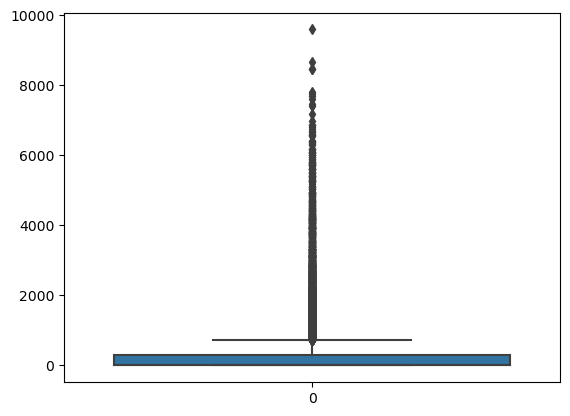

In [26]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
sns.boxplot(clean_data['video_comment_count'])


In [10]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
q_low = clean_data["video_like_count"].quantile(0.25)
q_hi  = clean_data["video_like_count"].quantile(0.75)

iqr = q_hi - q_low
upper_limit = q_hi + 1.5 * iqr

clean_data.loc[clean_data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit


In [11]:
clean_data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

<Axes: >

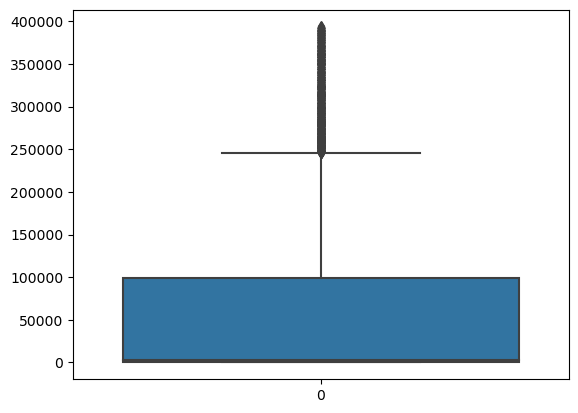

In [32]:
sns.boxplot(df_filtered['video_like_count'])

Check class balance.

In [33]:
# Check class balance for video_comment_count
### YOUR CODE HERE ###
clean_data['video_comment_count'].value_counts()

video_comment_count
0.0       3434
1.0       2222
2.0       1097
3.0        788
4.0        545
          ... 
688.0        1
2661.0       1
2061.0       1
2292.0       1
3372.0       1
Name: count, Length: 2424, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [13]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample
# Identify data points from majority and minority classes
### YOUR CODE HERE ###
df_verified = clean_data[clean_data['verified_status'] == 'verified']
df_not_verified = clean_data[clean_data['verified_status'] == 'not verified']

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
df_verified_upsampled = resample(df_verified, 
                                 replace=True,     
                                 n_samples=17000)

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
df_upsampled = pd.concat([df_verified_upsampled, df_not_verified])
# Display new class counts
### YOUR CODE HERE ###
df_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17000
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [14]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
opinion = df_not_verified[df_not_verified['claim_status'] == 'opinion']
claim = df_not_verified[df_not_verified['claim_status'] == 'claim']

opinion_length = opinion['video_transcription_text'].str.len().mean()
claim_length = claim['video_transcription_text'].str.len().mean()

print("Opinion mean: " + str(opinion_length) + " | Claim mean: " + str(claim_length))

Opinion mean: 82.76888626988804 | Claim mean: 95.38844557931695


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [17]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
df_upsampled['transcription_length'] = df_upsampled['video_transcription_text'].str.len()


In [18]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
df_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
13175,13176,opinion,1862660033,18,our reasoning is that more businesses will be ...,verified,under review,1263.0,397.0,127.0,0.0,0.0,77
8967,8968,claim,2778446510,20,someone discovered on tv a claim that at birth...,verified,active,569298.0,202880.0,33743.0,70.0,5.0,81
19022,19023,opinion,8542621111,17,in our opinion some sharks can glow in the dark,verified,active,5195.0,1019.0,245.0,20.0,6.0,47
18609,18610,opinion,9837502961,10,my friends are convinced that the largest roc...,verified,active,6832.0,880.0,146.0,7.0,2.0,72
10856,10857,opinion,4877446557,40,my colleagues think that butterflies taste wit...,verified,active,9265.0,3102.0,41.0,50.0,1.0,58


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

<Axes: xlabel='transcription_length', ylabel='Count'>

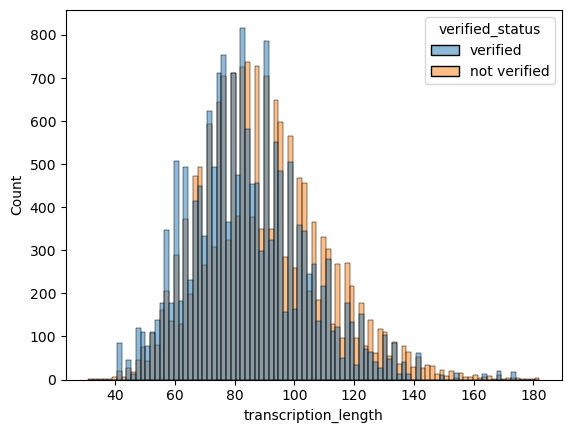

In [19]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###


sns.histplot(data=df_upsampled , hue="verified_status", x="transcription_length")


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [21]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
dataCorr = df_upsampled.corr(numeric_only=True)

Visualize a correlation heatmap of the data.

In [89]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
clean_data.dtypes

clean_data['claim_status'] = OneHotEncoder(drop='first').fit_transform(clean_data[['claim_status']]).toarray()


/tmp/ipykernel_56/1255457049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['claim_status'] = OneHotEncoder(drop='first').fit_transform(clean_data[['claim_status']]).toarray()


In [91]:
clean_data.drop(columns="video_transcription_text")

,#,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,0.0,7017666017,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97.0
1,2,0.0,4014381136,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107.0
2,3,0.0,9859838091,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137.0
3,4,0.0,1866847991,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131.0
4,5,0.0,7105231098,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,1.0,1492320297,49,not verified,active,6067.0,423.0,81.0,8.0,2.0,65.0
19080,19081,1.0,9841347807,23,not verified,active,2973.0,820.0,70.0,3.0,0.0,66.0
19081,19082,1.0,8024379946,50,not verified,active,734.0,102.0,7.0,2.0,1.0,53.0
19082,19083,1.0,7425795014,8,not verified,active,3394.0,655.0,123.0,11.0,4.0,80.0


In [94]:
clean_data['author_ban_status'] = OneHotEncoder(drop='first').fit_transform(clean_data[['author_ban_status']]).toarray()

/tmp/ipykernel_56/39540550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['author_ban_status'] = OneHotEncoder(drop='first').fit_transform(clean_data[['author_ban_status']]).toarray()


In [23]:
new_data = df_upsampled.drop(columns=["video_transcription_text", "#"])

In [99]:
new_data = clean_data.drop(columns="#")

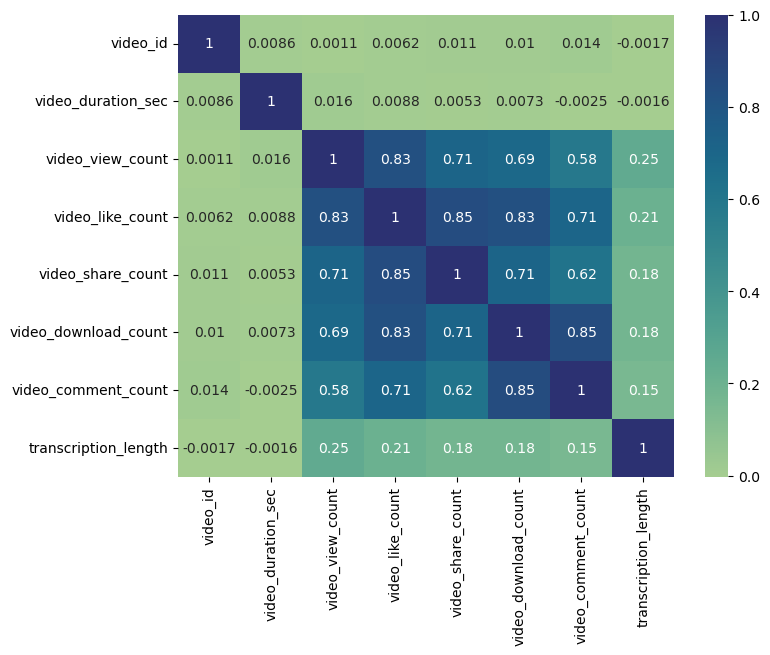

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_data.corr(numeric_only=True), annot=True, cmap='crest')
plt.show()

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [28]:
# Select outcome variable
### YOUR CODE HERE ###
y = new_data['verified_status']



Select the features.

In [26]:
# Select features
### YOUR CODE HERE ###
X = new_data[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]


# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
13175,18,opinion,under review,1263.0,127.0,0.0,0.0
8967,20,claim,active,569298.0,33743.0,70.0,5.0
19022,17,opinion,active,5195.0,245.0,20.0,6.0
18609,10,opinion,active,6832.0,146.0,7.0,2.0
10856,40,opinion,active,9265.0,41.0,50.0,1.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [29]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [31]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26163, 7), (8721, 7), (26163,), (8721,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [32]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes


video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
new_data['claim_status'].value_counts()


claim_status
opinion    22525
claim      12359
Name: count, dtype: int64

In [34]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
new_data['author_ban_status'].value_counts()


author_ban_status
active          29542
under review     3089
banned           2253
Name: count, dtype: int64

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [36]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_train_to_encode = X_train[['claim_status','author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
X_train_to_encode

,claim_status,author_ban_status
15741,opinion,active
15525,opinion,active
169,claim,active
1402,claim,active
12508,opinion,active
...,...,...
3844,claim,active
15995,opinion,active
14095,opinion,active
4342,claim,active


In [38]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
X_encoder = OneHotEncoder(drop='first',sparse_output=False)

In [39]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encoder = X_encoder.fit_transform(X_train_to_encode)

In [40]:
# Get feature names from encoder
### YOUR CODE HERE ###
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [41]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encoder

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [42]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_train_encoded_df = pd.DataFrame(data=X_train_encoder, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [44]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
15741,5,3269.0,71.0,1.0,0.0
15525,7,9536.0,1256.0,44.0,7.0
169,27,886215.0,114330.0,10943.0,4219.0
1402,30,490332.0,61014.0,5931.0,1316.0
12508,5,5952.0,536.0,25.0,3.0


In [123]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train

17406    1.0
8704     0.0
8019     0.0
11854    1.0
12156    1.0
        ... 
11284    1.0
11964    1.0
5390     0.0
860      0.0
15795    1.0
Name: claim_status, Length: 13358, dtype: float64

In [45]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

In [46]:
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,5,3269.0,71.0,1.0,0.0,1.0,0.0,0.0
1,7,9536.0,1256.0,44.0,7.0,1.0,0.0,0.0
2,27,886215.0,114330.0,10943.0,4219.0,0.0,0.0,0.0
3,30,490332.0,61014.0,5931.0,1316.0,0.0,0.0,0.0
4,5,5952.0,536.0,25.0,3.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [47]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

dtype('O')

In [48]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [50]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [56]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
y_encoded = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()
# Display the encoded training outcome variable]
### YOUR CODE HERE ###
print(y_encoded)

[0. 1. 1. ... 0. 0. 1.]


### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [57]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###

clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_encoded)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [58]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]


# Display first few rows
### YOUR CODE HERE ###
X_test_to_encode

,claim_status,author_ban_status
6898,claim,under review
10875,opinion,active
105,claim,under review
3416,claim,under review
12308,opinion,active
...,...,...
17763,opinion,active
13384,opinion,active
14523,opinion,active
4950,claim,under review


In [60]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [61]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [63]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
6898,8,510472.0,67081.0,839.0,425.0
10875,45,9883.0,560.0,23.0,3.0
105,49,631075.0,97442.0,1163.0,354.0
3416,19,626291.0,31169.0,7352.0,1108.0
12308,42,3360.0,32.0,6.0,1.0


In [64]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,8,510472.0,67081.0,839.0,425.0,0.0,0.0,1.0
1,45,9883.0,560.0,23.0,3.0,1.0,0.0,0.0
2,49,631075.0,97442.0,1163.0,354.0,0.0,0.0,1.0
3,19,626291.0,31169.0,7352.0,1108.0,0.0,0.0,1.0
4,42,3360.0,32.0,6.0,1.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [65]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [66]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
print(y_pred)

[0. 1. 0. ... 1. 0. 0.]


Display the true labels of the testing set.

In [139]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
0 = not verified 1 = verfified | 0 = claim 1= opinion|

In [67]:
y_test

6898     not verified
10875    not verified
105          verified
3416         verified
12308    not verified
             ...     
17763    not verified
13384        verified
14523    not verified
4950     not verified
853          verified
Name: verified_status, Length: 8721, dtype: object

In [150]:
clf.classes_


array([0., 1.])

Encode the true labels of the testing set so it can be compared to the predictions.

In [68]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([0., 0., 1., ..., 0., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [70]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train_final.shape, y_encoded.shape, X_test_final.shape, y_test_final.shape


((26163, 8), (26163,), (8721, 8), (8721,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

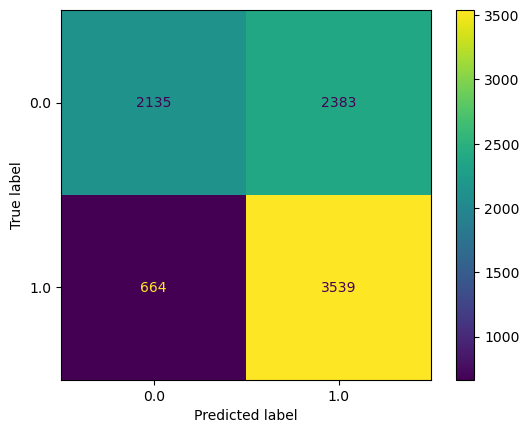

In [71]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test_final, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()
# Create display of confusion matrix
### YOUR CODE HERE ###

# Plot confusion matrix
### YOUR CODE HERE ###

# Display plot
### YOUR CODE HERE ###

In [73]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test_final, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test_final, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test_final, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test_final, y_pred))

Accuracy: 0.650613
Precision: 0.597602
Recall: 0.842018
F1 Score: 0.699062


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [74]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.76      0.47      0.58      4518
not verified       0.60      0.84      0.70      4203

    accuracy                           0.65      8721
   macro avg       0.68      0.66      0.64      8721
weighted avg       0.68      0.65      0.64      8721



### **Task 4c. Interpret model coefficients**

In [75]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":clf.feature_names_in_, "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.007136
1,video_view_count,-0.000002
2,video_share_count,0.000005
3,video_download_count,-0.000200
4,video_comment_count,0.000328
5,claim_status_opinion,0.000345
6,author_ban_status_banned,-0.000012
7,author_ban_status_under review,-0.000005


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 